In [1]:
import matplotlib 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helper import *
from tqdm import tqdm_notebook
import brainconn as bc
import pandas as pd
import seaborn as sns
import nilearn.plotting as plotting
import palettable as pal
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import scipy.stats as stats

In [2]:
conn_mat, labels, dist_mat, g_conn = load_marmoset_data()

In [3]:
disc_pal_4 = sns.color_palette("husl", 4)

In [4]:
def plot_diagram(dgm, ax, labels = False, **kwargs):
    """Plot the persistence diagram."""

    import matplotlib.pyplot as plt

    # inf = float('inf')
    # min_birth = min(p.birth for p in dgm if p.birth != inf)
    # max_birth = max(p.birth for p in dgm if p.birth != inf)
    # min_death = min(p.death for p in dgm if p.death != inf)
    # max_death = max(p.death for p in dgm if p.death != inf)

    # ax.set_aspect('equal', 'datalim')

    # min_diag = min(min_birth, min_death)
    # max_diag = max(max_birth, max_death)
    ax.scatter([p.birth for p in dgm], [p.death for p in dgm], **kwargs)
    # ax.plot([min_diag, max_diag], [min_diag, max_diag])        # diagonal

    if labels:
        ax.set_xlabel("birth")
        ax.set_ylabel("death")


def plot_bars(dgm, ax, order = 'birth', color='b'):
    """Plot the barcode."""

    import matplotlib.pyplot as plt

    if order == 'death':
        generator = enumerate(sorted(dgm, key = lambda p: p.death))
    else:
        generator = enumerate(dgm)

    for i,p in generator:
        ax.plot([p.birth, p.death], [i,i], color = color)


In [5]:
import dionysus as d
dgms_list, persis_pairs_used = load_pickle_file('data/motifs_dgms_original.pickle')

Text(0.5, 0, 'filtration by weight')

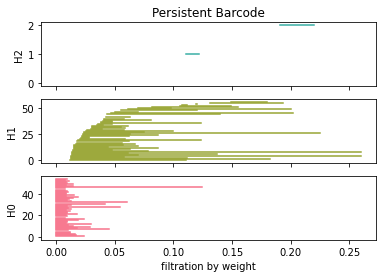

In [6]:
dgms = dgms_list[0]

c_0, c_1, c_2 = disc_pal_4[:3]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='all')
ax1.set_title('Persistent Barcode')
plot_bars(dgms[2], color=c_2, ax=ax1)
ax1.set_ylabel('H2')
plot_bars(dgms[1], color=c_1, ax=ax2)
ax2.set_ylabel('H1')
plot_bars(dgms[0], color=c_0, ax=ax3)
ax3.set_ylabel('H0')
ax3.set_xlabel('filtration by weight')

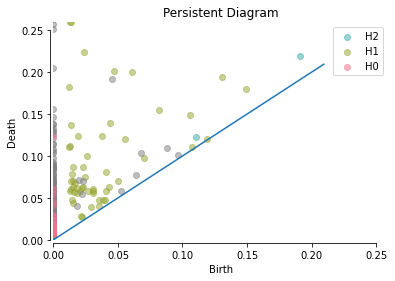

In [7]:
dgms = dgms_list[0]
fig, ax = plt.subplots(1, 1)
plot_diagram(dgms[2], ax=ax, c=np.array(c_2).reshape(1, -1), label='H2', alpha=0.5)
plot_diagram(dgms[1], ax=ax, c=np.array(c_1).reshape(1, -1), label='H1', alpha=0.5)
plot_diagram(dgms[0], ax=ax, c=np.array(c_0).reshape(1, -1), label='H0', alpha=0.5, zorder=50)
min_birth = min(p.birth for dgm in dgms for p in dgm if p.birth != np.inf and p.death != np.inf)
max_birth = max(p.birth for dgm in dgms for p in dgm if p.birth != np.inf and p.death != np.inf)
min_death = min(p.death for dgm in dgms for p in dgm if p.birth != np.inf and p.death != np.inf)
max_death = max(p.death for dgm in dgms for p in dgm if p.birth != np.inf and p.death != np.inf)
min_diag = min(min_birth, min_death)
max_diag = max(max_birth, max_death)
ax.plot([min_diag, max_diag-0.05], [min_diag, max_diag-0.05])
plt.axis([min_diag, max_diag, min_diag, max_diag])
plt.xlabel('Birth')
plt.ylabel('Death')
plt.legend()
plt.title('Persistent Diagram')
for dgms in dgms_list[1:]:
    plot_diagram(dgms[2], ax=ax, color='gray', label='H2', alpha=0.5)
    plot_diagram(dgms[1], ax=ax, color='gray', label='H1', alpha=0.5)
    plot_diagram(dgms[0], ax=ax, color='gray', label='H0', alpha=0.5)
sns.despine(top=True, right=True, left=False, bottom=False, offset=3, trim=True)

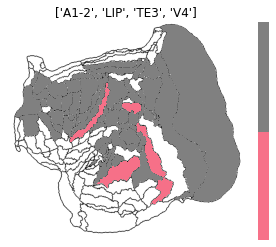

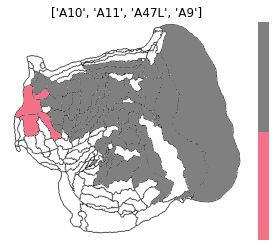

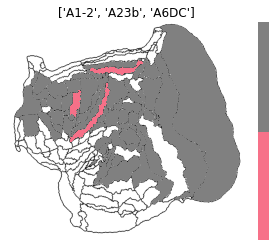

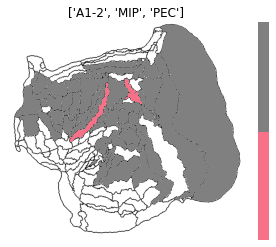

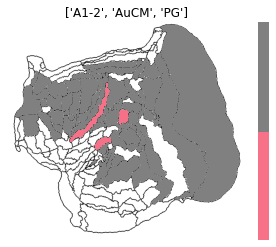

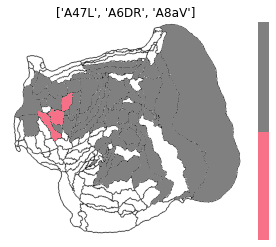

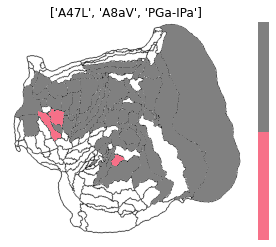

In [9]:
cavities_list = [['A1-2', 'LIP', 'TE3', 'V4'],
                 ['A10', 'A11', 'A47L', 'A9'],
                 ['A1-2', 'A23b', 'A6DC'],
                 ['A1-2', 'MIP', 'PEC'],
                 ['A1-2', 'AuCM', 'PG'],
                 ['A47L', 'A6DR', 'A8aV'],
                 ['A47L', 'A8aV', 'PGa-IPa']]

imshow_cmap = mcolors.ListedColormap([disc_pal_4[0], 'gray'])
bounds=[0.5,1.5, 2.5]
norm = mcolors.BoundaryNorm(bounds, imshow_cmap.N)

for idx, cavity in enumerate(cavities_list):
    chosen = [1 if _ in cavity else 2 for _ in labels]
    fig, ax, cb = plot_flatmap(chosen, interpolation='nearest', cmap=imshow_cmap, norm=norm)
    cb.set_ticks([])
    ax.set_title(cavity)